In [35]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib
import matplotlib.pyplot as plt


df = pd.read_csv("data.csv")

# feature_columns = ['price','number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'host_listings_count', 'host_total_listings_count', 'host_response_rate', 'host_acceptance_rate', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm','host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'bathrooms', 'accomodate', 'bedrooms', 'beds',  'Entire guesthouse_property_type', 'Entire rental unit_property_type', 'Entire condo_property_type', 'Room in boutique hotel_property_type', 'Private room in casa particular_property_type', 'Entire home_property_type', 'Private room in rental unit_property_type', 'Private room in home_property_type', 'Entire loft_property_type', 'Room in hotel_property_type', 'Entire serviced apartment_property_type', 'Private room in condo_property_type', 'Private room in villa_property_type', 'Private room in guest suite_property_type', 'Room in aparthotel_property_type', 'Room in serviced apartment_property_type', 'Private room in townhouse_property_type', 'Private room_property_type', 'Shared room in rental unit_property_type', 'Entire guest suite_property_type', 'Private room in guesthouse_property_type', 'Private room in serviced apartment_property_type', 'Private room in hostel_property_type', 'Entire villa_property_type', 'Private room in bed and breakfast_property_type', 'Entire townhouse_property_type', 'Private room in loft_property_type', 'Shared room in home_property_type', 'Entire bungalow_property_type', 'Private room in cottage_property_type', 'Entire cabin_property_type', 'Private room in bungalow_property_type', 'Shared room in guesthouse_property_type', 'Tiny home_property_type', 'Entire cottage_property_type', 'Shared room in hostel_property_type', 'Entire place_property_type', 'Private room in tiny home_property_type', 'Farm stay_property_type', 'Entire vacation home_property_type', 'Boat_property_type', 'Ranch_property_type', 'Room in hostel_property_type', 'Casa particular_property_type', 'Camper/RV_property_type', 'Private room in resort_property_type', 'Private room in camper/rv_property_type', 'Private room in vacation home_property_type', 'Earthen home_property_type', 'Shared room in bed and breakfast_property_type', 'Private room in treehouse_property_type', 'Entire bed and breakfast_property_type', 'Private room_room_type', 'Shared room_room_type', 'Entire home/apt_room_type', 'Hotel room_room_type', 'Tha?lande_country', 'France_country', 'United Kingdom_country', 'Australie_country', 'USA_country', 'Argentine_country', 'Bresil_country', 'Japon_country', 'Espagne_country']

feature_columns = ["price", "number_of_reviews_ltm", "number_of_reviews",
    "host_acceptance_rate", "host_total_listings_count"]  

target_column = "prediction" 

if not all(col in df.columns for col in feature_columns + [target_column]):
    raise ValueError("One or more specified columns are missing in the dataset!")

categorical_cols = df[feature_columns].select_dtypes(include=["object"]).columns.tolist()
print("Categorical Columns:", categorical_cols)

# Select features (X) and target (y) using column names
X = df[feature_columns]  
y = df[target_column]    

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Save the trained model
model_path = "rf_model.joblib"
joblib.dump(rf_model, model_path)
print(f"Model saved as {model_path}")

# Function to make predictions
def predict_announcement(features):

    features_array = np.array(features).reshape(1, -1)  # Ensure correct shape
    prediction = rf_model.predict(features_array)
    return prediction[0]

# Example prediction 
example_features = X_test.iloc[0].values  # Take the first test row
prediction_result = predict_announcement(example_features)
print("Prediction for example data:", prediction_result)




Categorical Columns: []
Model Accuracy: 0.62
Model saved as rf_model_5.joblib
Prediction for example data: Successfull


D:\PycharmProjects\bibliotheque\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [14]:
print(df.columns.tolist())


['geographic_area_id', 'calendar_last_scraped_date_id', 'price', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'host_listings_count', 'host_total_listings_count', 'host_response_rate', 'host_acceptance_rate', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'host_since', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'property_type', 'room_type', 'bathrooms', 'accomod


Top 20 Important Features:
                                        Feature  Importance
0                                         price    0.094309
2                         number_of_reviews_ltm    0.069446
1                             number_of_reviews    0.069194
11                         host_acceptance_rate    0.057416
9                     host_total_listings_count    0.047849
13                               maximum_nights    0.043663
15                       maximum_minimum_nights    0.043295
8                           host_listings_count    0.041662
12                               minimum_nights    0.040003
14                       minimum_minimum_nights    0.038503
5   calculated_host_listings_count_entire_homes    0.037281
4                calculated_host_listings_count    0.037275
18                       minimum_nights_avg_ntm    0.036654
3                        number_of_reviews_l30d    0.036573
10                           host_response_rate    0.034697
16          

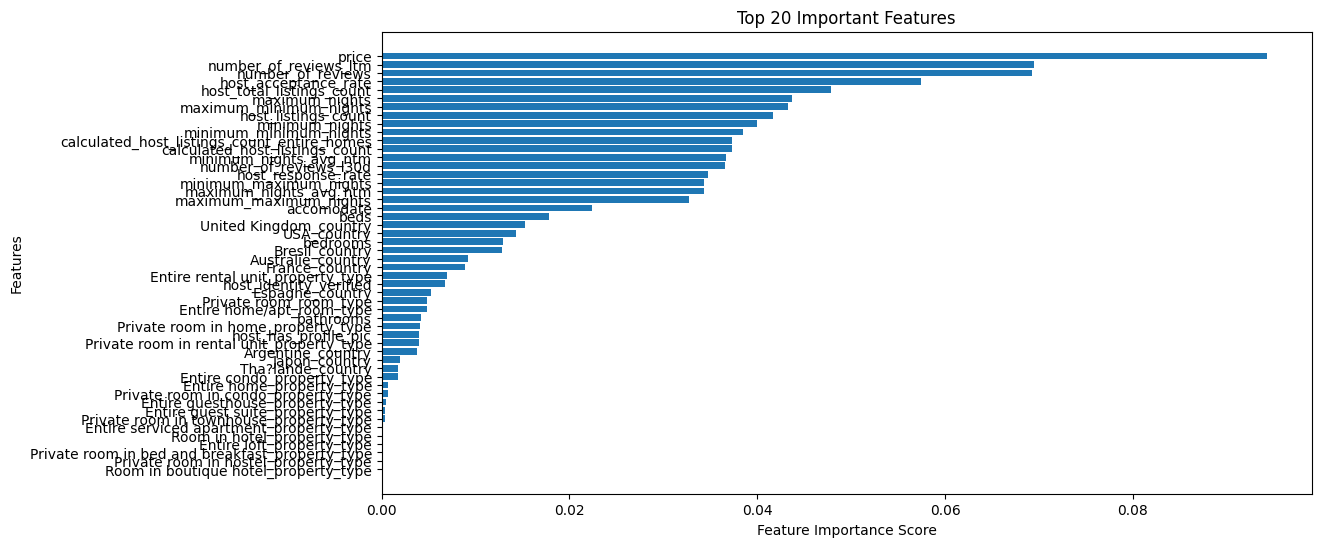

In [25]:
import matplotlib.pyplot as plt
# === STEP 4: COMPUTE FEATURE IMPORTANCE ===
if hasattr(rf_model, "feature_importances_"):
    feature_importances = rf_model.feature_importances_
    
    # Create a DataFrame for feature importance
    importance_df = pd.DataFrame({
        "Feature": feature_columns,
        "Importance": feature_importances
    }).sort_values(by="Importance", ascending=False)

    # Display top features
    print("\nTop 20 Important Features:")
    print(importance_df.head(20))

    # === STEP 5: PLOT FEATURE IMPORTANCE ===
    plt.figure(figsize=(12, 6))
    plt.barh(importance_df["Feature"][:50], importance_df["Importance"][:50])  # Show top 20 features
    plt.xlabel("Feature Importance Score")
    plt.ylabel("Features")
    plt.title("Top 50 Important Features")
    plt.gca().invert_yaxis()  # Highest importance at the top
    plt.show()
    
else:
    print("The model does not support feature importance extraction.")

In [29]:
import pandas as pd
import joblib
from sklearn.preprocessing import StandardScaler
from datetime import datetime

# Load datasets
normalized_data_path = "data.csv"   # Replace with actual file path
denormalized_data_path = "datadenormalised.csv"  # Replace with actual file path

df_normalized = pd.read_csv(normalized_data_path)
df_denormalized = pd.read_csv(denormalized_data_path)

# Ensure both datasets have the same columns
if not all(df_normalized.columns == df_denormalized.columns):
    raise ValueError("Mismatch between normalized and denormalized data columns!")

# List of columns to exclude (IDs, dates, or categorical text columns)
excluded_columns = [
    "geographic_area_id", "latitude", "longitude", "fact_listing_id", "host_id",
    "property_id", "first_review_date_id", "last_review_date_id", "calendar_last_scraped_date_id"
]

# Convert date columns to numerical format (days since 2000-01-01)
date_reference = datetime(2000, 1, 1)

for date_col in ["first_review_date_id", "last_review_date_id", "calendar_last_scraped_date_id"]:
    if date_col in df_denormalized.columns:
        df_denormalized[date_col] = pd.to_datetime(df_denormalized[date_col], errors="coerce")
        df_denormalized[date_col] = (df_denormalized[date_col] - date_reference).dt.days

# Drop excluded columns (IDs, non-numeric)
df_denormalized_cleaned = df_denormalized.drop(columns=[col for col in excluded_columns if col in df_denormalized.columns], errors="ignore")

# Ensure only numerical data is used for normalization
numeric_columns = df_denormalized_cleaned.select_dtypes(include=["number"]).columns
df_denormalized_cleaned = df_denormalized_cleaned[numeric_columns]

# Fit the scaler using the cleaned denormalized data
scaler = StandardScaler()
scaler.fit(df_denormalized_cleaned)  # Fit on numeric data only

# Save the scaler for future use
scaler_path = "scaler.joblib"
joblib.dump(scaler, scaler_path)
print(f"Scaler saved as {scaler_path}")

Scaler saved as scaler.joblib


In [36]:
import numpy as np
import joblib
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the trained Random Forest model
model_path = "rf_model.joblib"
rf_model = joblib.load(model_path)

# Load the trained scaler (from full 103 features)
scaler_path = "scaler.joblib"
full_scaler = joblib.load(scaler_path)

# Load dataset to extract correct scaling for the top 20 features
denormalized_data_path = "datadenormalised.csv"  
df_denormalized = pd.read_csv(denormalized_data_path)

# Define the top 20 important features
top_20_features = [
    "price", "number_of_reviews_ltm", "number_of_reviews",
    "host_acceptance_rate", "host_total_listings_count",
    "maximum_nights", "maximum_minimum_nights", "host_listings_count",
    "minimum_nights", "minimum_minimum_nights",
    "calculated_host_listings_count_entire_homes", "calculated_host_listings_count",
    "minimum_nights_avg_ntm", "number_of_reviews_l30d", "host_response_rate",
    "minimum_maximum_nights", "maximum_nights_avg_ntm", "maximum_maximum_nights",
    "accomodate", "beds"
]

# Extract only the columns needed for normalization
df_selected = df_denormalized[top_20_features]

# Fit a new scaler on the 20 selected features
scaler = StandardScaler()
scaler.fit(df_selected)  # Fit only on the required features

# Save this new scaler for future use
joblib.dump(scaler, "scaler_20_features.joblib")
print("New scaler for 20 features saved as 'scaler_20_features.joblib'")

# Sample input before normalization (replace with real values)
sample_input = {
    "price": 120,
    "number_of_reviews_ltm": 50,
    "number_of_reviews": 30,
    "host_acceptance_rate": 95,
    "host_total_listings_count": 2,
    "maximum_nights": 365,
    "maximum_minimum_nights": 30,
    "host_listings_count": 1,
    "minimum_nights": 3,
    "minimum_minimum_nights": 1,
    "calculated_host_listings_count_entire_homes": 1,
    "calculated_host_listings_count": 1,
    "minimum_nights_avg_ntm": 5,
    "number_of_reviews_l30d": 2,
    "host_response_rate": 90,
    "minimum_maximum_nights": 100,
    "maximum_nights_avg_ntm": 200,
    "maximum_maximum_nights": 365,
    "accomodate": 4,
    "beds": 2
}

# Ensure all necessary features exist
for feature in top_20_features:
    if feature not in sample_input:
        sample_input[feature] = 0  # Default missing values to 0

# Convert dictionary to NumPy array
sample_array = np.array([sample_input[feature] for feature in top_20_features]).reshape(1, -1)

# Load the new scaler for 20 features
scaler_20 = joblib.load("scaler_20_features.joblib")

# Normalize the input sample using the new scaler
normalized_sample = scaler_20.transform(sample_array)

# Make a prediction
prediction = rf_model.predict(normalized_sample)

try:
    probability = rf_model.predict_proba(normalized_sample)
    print(f"\nPrediction: {prediction[0]}")
    print(f"Probability: {probability[0]}")
except AttributeError:
    print(f"\nPrediction: {prediction[0]}")


New scaler for 20 features saved as 'scaler_5_features.joblib'

Prediction: Unsuccessfull
Probability: [0.33 0.34 0.33]


D:\PycharmProjects\bibliotheque\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
D:\PycharmProjects\bibliotheque\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
D:\PycharmProjects\bibliotheque\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
